
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

In [14]:
df=pd.read_csv('water.csv')

In [15]:
df

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
...,...,...
74,1959,594
75,1960,587
76,1961,587
77,1962,625


In [11]:
df.tail()

,Year,Water
74,1959,594
75,1960,587
76,1961,587
77,1962,625
78,1963,613


In [16]:
df.set_index('Year',inplace=True)

In [17]:
df.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


In [18]:
df.describe()

,Water
count,79.000000
mean,512.025316
std,75.685072
min,344.000000
25%,462.000000
50%,503.000000
75%,581.000000
max,662.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Year'>

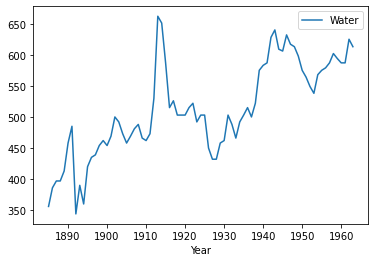

In [19]:
df.plot()

In [21]:
test_result=adfuller(df['Water'])

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [23]:
adfuller_test(df['Water'])

ADF Test Statistic : -2.077087450405189
p-value : 0.25382708879415783
#Lags Used : 2
Number of Observations Used : 76
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [24]:
df['Water First Difference'] = df['Water'] - df['Water'].shift(1)

In [25]:
df['Water'].shift(1)

Year
1885      NaN
1886    356.0
1887    386.0
1888    397.0
1889    397.0
        ...  
1959    602.0
1960    594.0
1961    587.0
1962    587.0
1963    625.0
Name: Water, Length: 79, dtype: float64

In [26]:
df['Seasonal First Difference']=df['Water']-df['Water'].shift(12)

In [27]:
df.head(14)

,Water,Water First Difference,Seasonal First Difference
Year,,,
1885,356,NaN,NaN
1886,386,30.0,NaN
1887,397,11.0,NaN
1888,397,0.0,NaN
1889,413,16.0,NaN
1890,458,45.0,NaN
1891,485,27.0,NaN
1892,344,-141.0,NaN
1893,390,46.0,NaN


In [28]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.010445967385933
p-value : 0.0013567900752141022
#Lags Used : 11
Number of Observations Used : 55
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Year'>

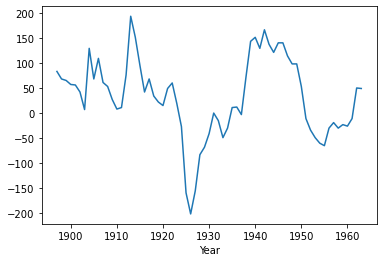

In [29]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
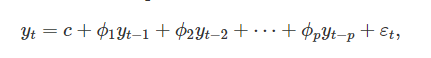

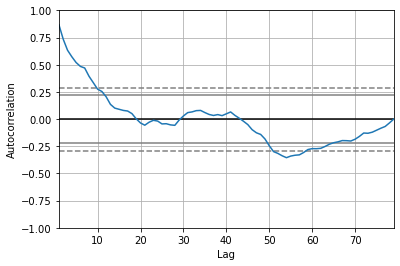

In [30]:

autocorrelation_plot(df['Water'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


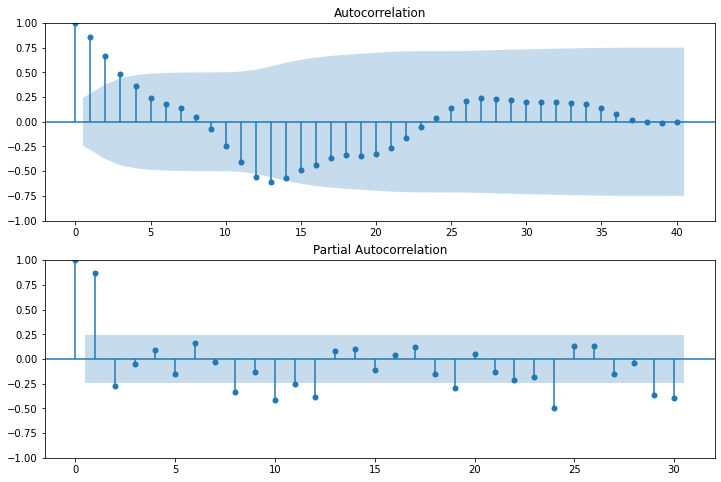

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=30,ax=ax2)

In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1


In [33]:
model=sm.tsa.arima.ARIMA(df['Water'],order=(1,1,1))
model_fit=model.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Water   No. Observations:                   79
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -383.091
Date:                Tue, 30 Aug 2022   AIC                            772.181
Time:                        15:56:31   BIC                            779.251
Sample:                             0   HQIC                           775.011
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1721      1.667     -0.103      0.918      -3.439       3.095
ma.L1          0.2216      1.660      0.133      0.894      -3.033       3.476
sigma2      1080.2141     91.245     11.839      0.000     901.376    1259.052
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               118.72
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Year'>

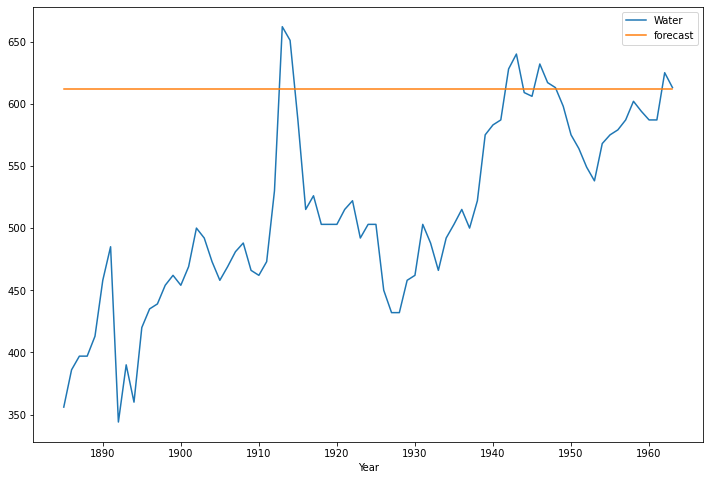

In [48]:
df['forecast']=model_fit.predict(start=1800,end=2000,dynamic=True)
df[['Water','forecast']].plot(figsize=(12,8))

In [49]:
model=sm.tsa.statespace.SARIMAX(df['Water'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Year'>

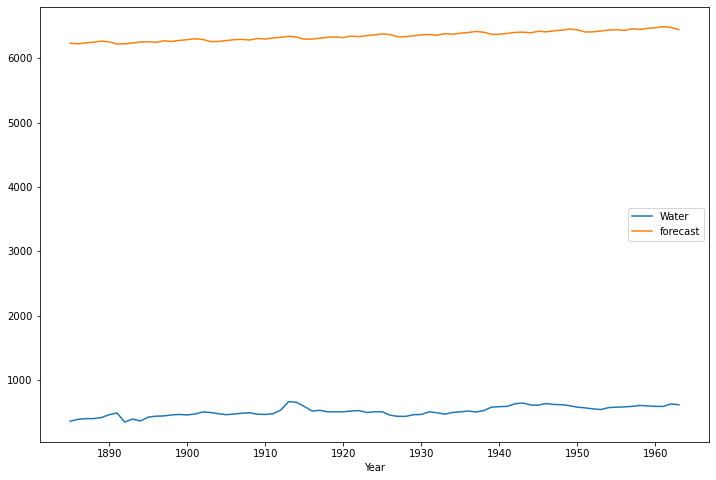

In [50]:
df['forecast']=results.predict(start=90,end=2000,dynamic=True)
df[['Water','forecast']].plot(figsize=(12,8))

In [39]:

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

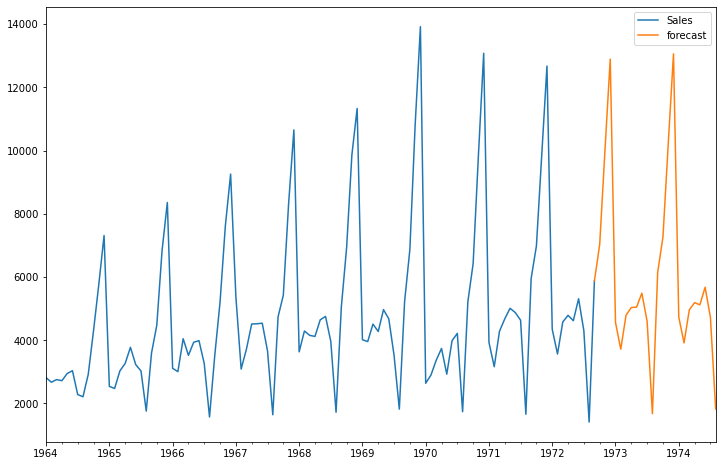

In [44]:
future_df['forecast'] = results.predict(start = 104, end = 140, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [38]:
future_df['forecast']

1964-01-01            NaN
1964-02-01            NaN
1964-03-01            NaN
1964-04-01            NaN
1964-05-01            NaN
                 ...     
1974-04-01    5189.453064
1974-05-01    5119.495280
1974-06-01    5675.242625
1974-07-01    4726.202440
1974-08-01    1823.475401
Name: forecast, Length: 128, dtype: float64